# Binary Search Tree
- 다수의 데이터를 관리(조회, 저장, 삭제)하기 위한 가장 기본적인 자료구조

### 성질
> 왼쪽 자식 노드 < 부모 노드 < 오른쪽 자식 노드

- 특정 노드의 key보다 그 왼쪽 자식 노드의 key값이 더 작다.
- 특정 노드의 key보다 그 오른쪽 자식 노드의 key값이 더 크다.
- 특정 노드의 왼쪽 서브 트리, 오른쪽 서브 트리 모두 이진 탐색 트리이다. 

## 배경 지식
### Tree
- <u>계층적인 구조를 표현</u>할 때 사용할 수 있는 자료구조

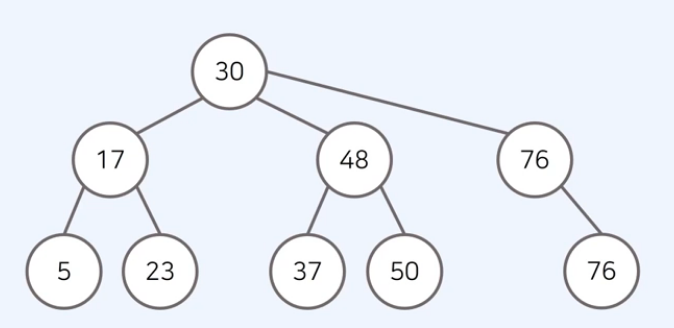

#### 용어
- `루트 노드(Root Node)`: 부모가 없는 최상위 노드
- `단말 노드(Leaf Node)`: 자식이 없는 말단 노드
- 트리에서는 <u>`부모(Parent)`, `자식(Child)` 관계</u>가 성립
- `형제 노드(Siblings)`: 같은 부모를 가진 노드
- `깊이(Depth)`: 루트노드에서의 길이
- `길이(Length)`: 출발 노드에서 목적지 노드까지 거쳐야 하는 간선의 수
- `높이(Height)`: 루트 노드에서 가장 깊은 노드까지의 길이

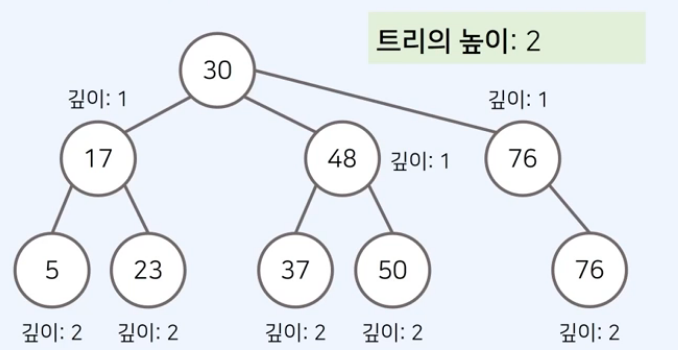

### 이진 트리(Binary Tree)
- 최대 2개의 자식을 가질 수 있는 트리

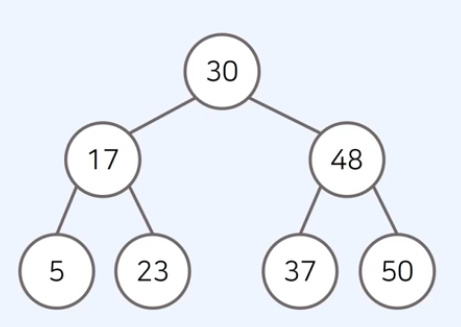

#### 포화 이진 트리(Full Binary Tree)
- 리프노드를 제외한 모든 노드가 두 자식을 가지고 있는 트리
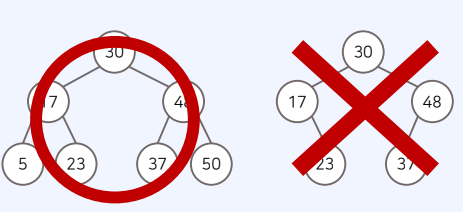

#### 완전 이진 트리(Complete Binary Tree)
- 모든 노드가 왼쪽 자식부터 차근차근 채워진 트리
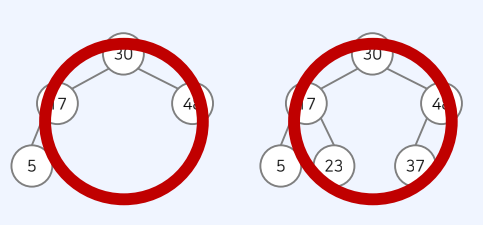

#### 높이 균형 트리(Height Balanced Tree)
- 왼쪽 자식 트리와 오른쪽 자식 트리의 높이가 1 이상 차이나지 않는 트리
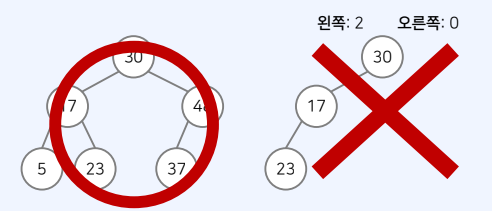

#### 참고: AVL 트리
- 균형이 갖춰진 이진 트리

In [3]:
from collections import deque

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def search(self, key):
        return self._search(self.root, key)
    
    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        
        # 현재 노드의 key보다 작으면 왼쪽으로
        if node.key > key:
            return self._search(node.left, key)
        # 현재 노드의 key보다 크면 오른쪽으로
        elif node.key < key:
            return self._search(node.right, key)
        
    def insert(self, key):
        self.root = self._insert(self.root, key)
    
    def _insert(self, node, key):
        if node is None:
            return Node(key)
        
        # 현재 노드의 key보다 작으면 왼쪽에 삽입
        if node.key > key:
            node.left = self._insert(node.left, key)
        # 현재 노드의 key보다 크면 오른쪽에 삽입
        elif node.key < key:
            node.right = self._insert(node.right, key)
        
        return node
    
    def delete(self, key):
        self.root = self._delete(self.root, key)
    
    def _delete(self, node, key):
        if node is None:
            return None

        # 현재 노드의 key보다 작으면 왼쪽으로
        if node.key > key:
            node.left = self._delete(node.left, key)
        # 현재 노드의 key보다 크면 오른쪽으로
        elif node.key < key:
            node.right = self._delete(node.right, key)
        
        # 삭제할 노드를 찾은 경우
        else:
            # 왼쪽 자식이 없는 경우 -> 오른쪽 자식으로 대체
            if node.left is None:
                return node.right
            # 오른쪽 자식이 없는 경우 -> 왼쪽 자식으로 대체
            elif node.right is None:
                return node.left
            #왼쪽과 오른쪽 자식 모두 있는 경우 -> 오른쪽 서브트리에서 가장 작은 노드로 대체
            node.key = self._get_min(node.right)
            node.right = self._delete(node.right, node.key)
        
        return node
    
    def _get_min(self, node):
        key = node.key
        while node.left: # "특정 노드의 key보다 그 왼쪽 자식 노드의 key값이 더 작다"는 성질 이용
            key = node.left.key
            node = node.left

        return key
    
    def preorder(self):
        self._preorder(self.root)
    
    def _preorder(self, node): # 루트 방문 -> 왼쪽 자식 방문 -> 오른쪽 자식 방문
        if node:
            print(node.key, end=" ")
            self._preorder(node.left)
            self._preorder(node.right)
        
    def inorder(self):
        self._inorder(self.root)
    
    def _inorder(self, node): # 왼쪽 자식 방문 -> 루트 방문 -> 오른쪽 자식 방문
        if node:
            self._inorder(node.left)
            print(node.key, end=" ")
            self._inorder(node.right)
    
    def postorder(self):
        self._postorder(self.root)

    def _postorder(self, node): # 왼쪽 자식 방문 -> 오른쪽 자식 방문 -> 루트 방문
        if node:
            self._postorder(node.left)
            self._postorder(node.right)
            print(node.key, end=" ")

    def levelorder(self):
        return self._levelorder(self.root)
    
    def _levelorder(self, node): # 루트 노드부터 너비 우선 탐색(BFS) 진행
        if node is None:
            return None

        result = []

        queue = deque()
        queue.append((0, node)) # (level, node), root에서부터 출발

        while queue:
            level, node = queue.popleft() # queue에서 노드를 꺼내서
            
            if node:
                result.append((level, node.key)) # result에 넣고, 
                queue.append((level+1, node.left)) # 꺼낸 노드의 왼쪽 자식과
                queue.append((level+1, node.right)) # 오른쪽 자식을 넣어준 후 다시 루프를 돈다.
        
        for level, key in result:
            print(f"level: {level}, key: {key}")
    
    def to_list(self):
        return self._to_list(self.root)

    def _to_list(self, node):
        if node is None:
            return []
        return self._to_list(node.left) + [node.key] + self._to_list(node.right)

In [4]:
arr = [7, 4, 5, 9, 6, 3, 2, 8]
bst = BinarySearchTree()
for x in arr:
    bst.insert(x)
print('전위 순회:', end=' ')
bst.preorder()
print('\n중위 순회:', end=' ')
bst.inorder()
print('\n후위 순회:', end=' ')
bst.postorder()
print('\n[레벨 순회]')
bst.levelorder()

bst.delete(7)
print('\n전위 순회:', end=' ')
bst.preorder()
print('\n중위 순회:', end=' ')
bst.inorder()
print('\n후위 순회:', end=' ')
bst.postorder()
print('\n[레벨 순회]')
bst.levelorder()

bst.delete(4)
print('\n전위 순회:', end=' ')
bst.preorder()
print('\n중위 순회:', end=' ')
bst.inorder()
print('\n후위 순회:', end=' ')
bst.postorder()
print('\n[레벨 순회]')
bst.levelorder()

bst.delete(3)
print('\n전위 순회:', end=' ')
bst.preorder()
print('\n중위 순회:', end=' ')
bst.inorder()
print('\n후위 순회:', end=' ')
bst.postorder()
print('\n[레벨 순회]')
bst.levelorder()

print(bst.to_list())

전위 순회: 7 4 3 2 5 6 9 8 
중위 순회: 2 3 4 5 6 7 8 9 
후위 순회: 2 3 6 5 4 8 9 7 
[레벨 순회]
level: 0, key: 7
level: 1, key: 4
level: 1, key: 9
level: 2, key: 3
level: 2, key: 5
level: 2, key: 8
level: 3, key: 2
level: 3, key: 6

전위 순회: 8 4 3 2 5 6 9 
중위 순회: 2 3 4 5 6 8 9 
후위 순회: 2 3 6 5 4 9 8 
[레벨 순회]
level: 0, key: 8
level: 1, key: 4
level: 1, key: 9
level: 2, key: 3
level: 2, key: 5
level: 3, key: 2
level: 3, key: 6

전위 순회: 8 5 3 2 6 9 
중위 순회: 2 3 5 6 8 9 
후위 순회: 2 3 6 5 9 8 
[레벨 순회]
level: 0, key: 8
level: 1, key: 5
level: 1, key: 9
level: 2, key: 3
level: 2, key: 6
level: 3, key: 2

전위 순회: 8 5 2 6 9 
중위 순회: 2 5 6 8 9 
후위 순회: 2 6 5 9 8 
[레벨 순회]
level: 0, key: 8
level: 1, key: 5
level: 1, key: 9
level: 2, key: 2
level: 2, key: 6
[2, 5, 6, 8, 9]
